In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})
area = meshmask.e1t[0] * meshmask.e2t[0]
e3t = meshmask.e3t_0[0]
e3t = e3t.rename({'z': 'deptht'})
mbathy = meshmask.mbathy[0]

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')
cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('grey')
cm_rain = copy.copy(cm.rain)
cm_rain.set_bad('grey')

In [4]:
ii, jj = 448, 306
jmin, jmax = 270, 330
imin, imax = 420, 480
xcy = 447
ycx = 305


In [5]:
new = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/26jul18/SalishSea_1h_20180726_20180726_biol_T.nc')
base = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/26jul18/SalishSea_1h_20180726_20180726_biol_T.nc')
base

<xarray.Dataset>
Dimensions:                       (y: 898, x: 398, nvertex: 4, deptht: 40,
                                   axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat                       (y, x) float32 ...
    nav_lon                       (y, x) float32 ...
  * deptht                        (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered                 (time_counter) datetime64[ns] ...
  * time_counter                  (time_counter) datetime64[ns] 2018-07-26T00...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/16)
    bounds_lon                    (y, x, nvertex) float32 ...
    bounds_lat                    (y, x, nvertex) float32 ...
    area                          (y, x) float32 ...
    deptht_bounds                 (deptht, axis_nbounds) float32 ...
    nitrate                       (time_counter, deptht, y, x) float32 ...
    time_centered_bounds          (time_counter, axis_nbounds) datetime64[ns] ...
    ...                            ...
    flagellates                   (time_counter, deptht, y, x) float32 ...
    microzooplankton              (time_counter, deptht, y, x) float32 ...
    dissolved_organic_nitrogen    (time_counter, deptht, y, x) float32 ...
    particulate_organic_nitrogen  (time_counter, deptht, y, x) float32 ...
    biogenic_silicon              (time_counter, deptht, y, x) float32 ...
    mesozooplankton               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20180726_20180731
    description:  biology
    title:        biology
    Conventions:  CF-1.6
    timeStamp:    2022-Dec-02 07:34:49 GMT
    uuid:         a1abeeca-d099-4af7-9dd1-692320f93f59

In [5]:
def planview(base, new, field, it, ide, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(f'Base {field}')

    new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]-
     base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]).where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]
     ).plot(ax=axs[2], cmap=cm_bwr, 
                                                              vmax=dvmax, vmin=-dvmax)
    axs[2].set_title(f'Difference (New-Base) {field}')

    for ax in axs:
        viz_tools.set_aspect(ax)

    fig.suptitle(f'Depth {base.deptht[ide].values:.0f} m')

    axs[0].scatter(304 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[0].scatter(304 - 280, 447 - 430, marker = 'x', color = 'm')
    axs[0].scatter(305 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[0].scatter(305 - 280, 447 - 430, marker = 'x', color = 'm')

    axs[1].scatter(304 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[1].scatter(304 - 280, 447 - 430, marker = 'x', color = 'm')
    axs[1].scatter(305 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[1].scatter(305 - 280, 447 - 430, marker = 'x', color = 'm')

    axs[2].scatter(304 - 280, 446 - 430, marker = 'x', color = 'g')
    axs[2].scatter(304 - 280, 447 - 430, marker = 'x', color = 'g')
    axs[2].scatter(305 - 280, 446 - 430, marker = 'x', color = 'g')
    axs[2].scatter(305 - 280, 447 - 430, marker = 'x', color = 'g')

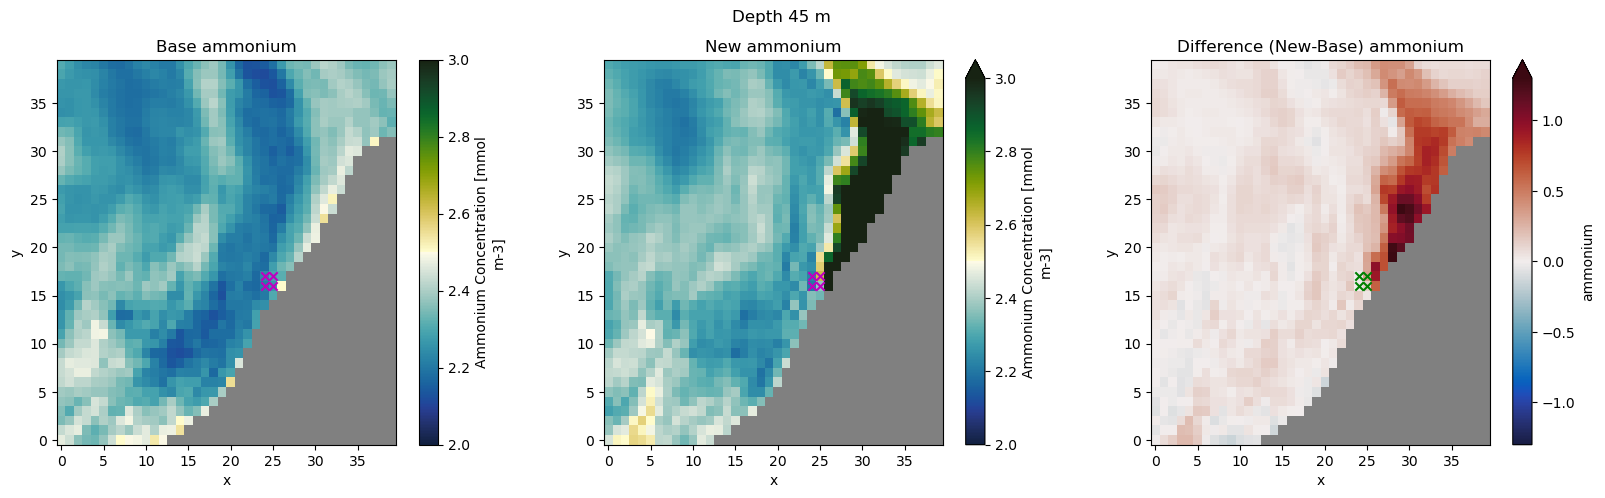

In [6]:
planview(base, new, 'ammonium', 23, 23 , cm_delta, 3, 2, 1.3)

In [7]:
def verticalview(base, new, field, it, dep, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, dep, 250+iz:350-iz]-
     base[field][it, :, dep, 250+iz:350-iz]).where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')


    fig.suptitle(f'Vertical view at y = {dep}')

    if dep == 446:
     axs[0].scatter(304 - 280, 98, marker = 'x', color = 'm')
     axs[0].scatter(305 - 280, 76, marker = 'x', color = 'm')

     axs[1].scatter(304 - 280, 98, marker = 'x', color = 'm')
     axs[1].scatter(305 - 280, 76, marker = 'x', color = 'm')

     axs[2].scatter(304 - 280, 98, marker = 'x', color = 'g')
     axs[2].scatter(305 - 280, 76, marker = 'x', color = 'g')
    else:
     axs[0].scatter(304 - 280, 121, marker = 'x', color = 'm')
     axs[0].scatter(305 - 280, 98, marker = 'x', color = 'm')

     axs[1].scatter(304 - 280, 121, marker = 'x', color = 'm')
     axs[1].scatter(305 - 280, 98, marker = 'x', color = 'm')

     axs[2].scatter(304 - 280, 121, marker = 'x', color = 'g')
     axs[2].scatter(305 - 280, 98, marker = 'x', color = 'g')

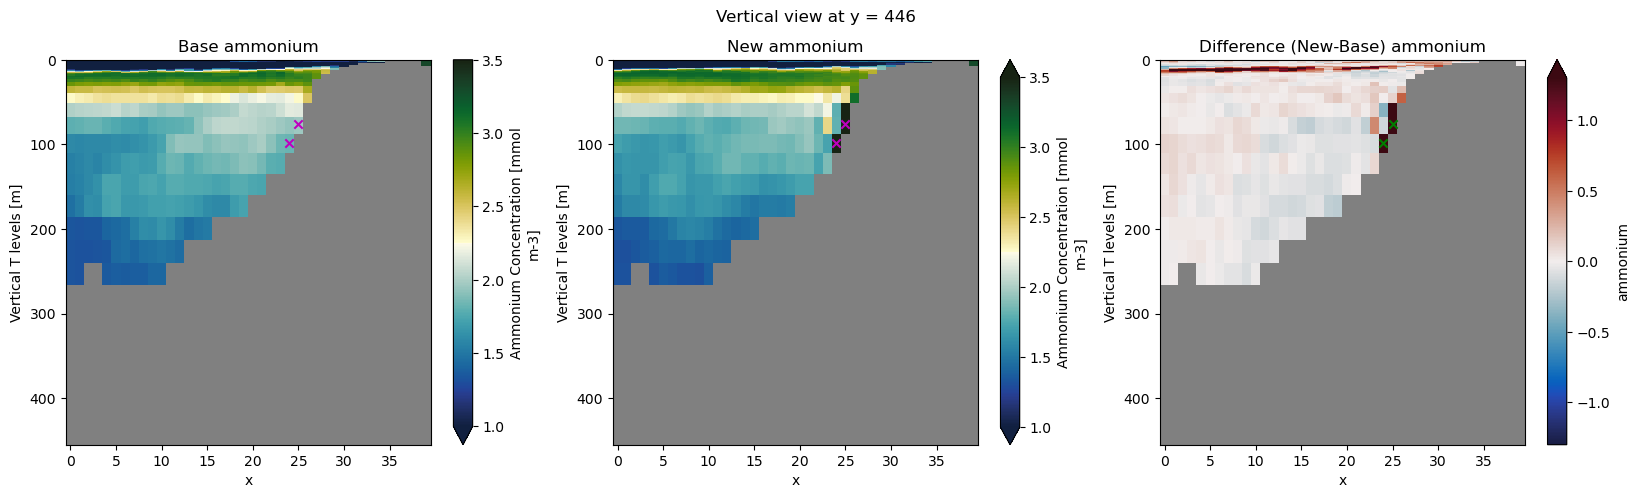

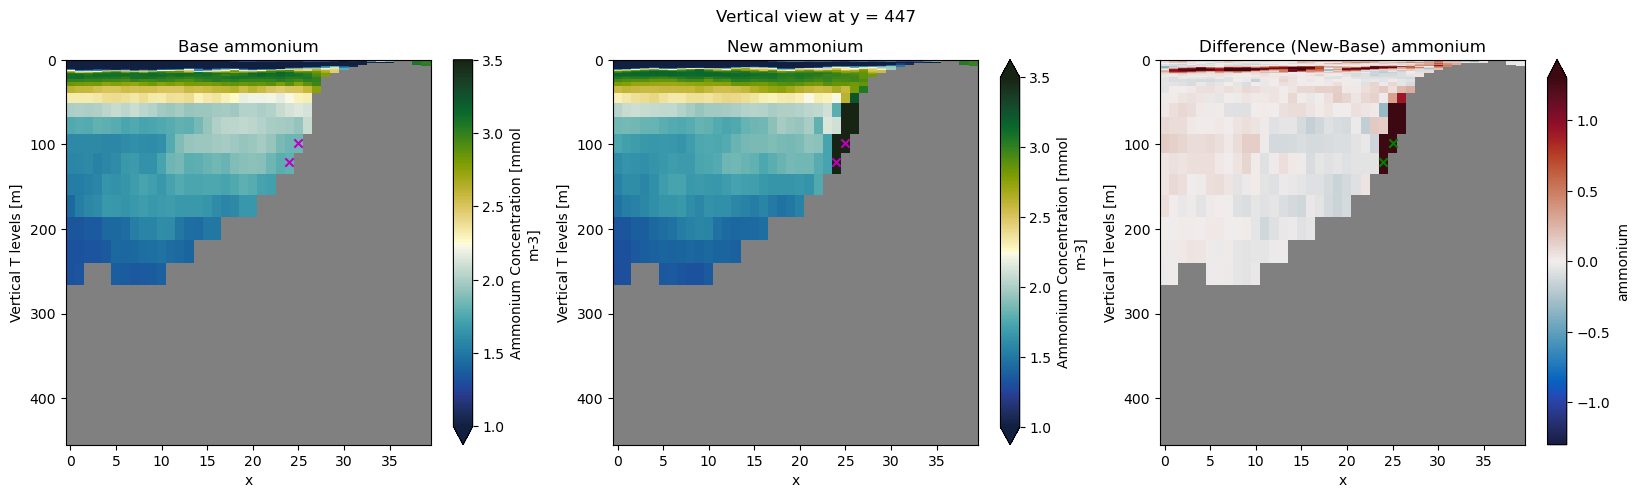

In [8]:
verticalview(base, new, 'ammonium', 23, 446 , cm_delta, 3.5, 1, 1.3)
verticalview(base, new, 'ammonium', 23, 447 , cm_delta, 3.5, 1, 1.3)

In [9]:
def vertical_view_x(base, new, field, it, dep,  cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, 400+iz:500-iz, dep]-
     base[field][it, :, 400+iz:500-iz, dep]).where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')

    fig.suptitle(f'Vertical view at x = {dep}')

    if dep == 304:
        axs[0].scatter(447 - 430, 121, marker = 'x', color = 'm')
        axs[0].scatter(446 - 430, 98, marker = 'x', color = 'm')

        axs[1].scatter(447 - 430, 121, marker = 'x', color = 'm')
        axs[1].scatter(446 - 430, 98, marker = 'x', color = 'm')

        axs[2].scatter(447 - 430, 121, marker = 'x', color = 'g')
        axs[2].scatter(446 - 430, 98, marker = 'x', color = 'g')
    
    else:
        axs[0].scatter(447 - 430, 98, marker = 'x', color = 'm')
        axs[0].scatter(446 - 430, 76, marker = 'x', color = 'm')

        axs[1].scatter(447 - 430, 98, marker = 'x', color = 'm')
        axs[1].scatter(446 - 430, 76, marker = 'x', color = 'm')

        axs[2].scatter(447 - 430, 98, marker = 'x', color = 'g')
        axs[2].scatter(446 - 430, 76, marker = 'x', color = 'g')

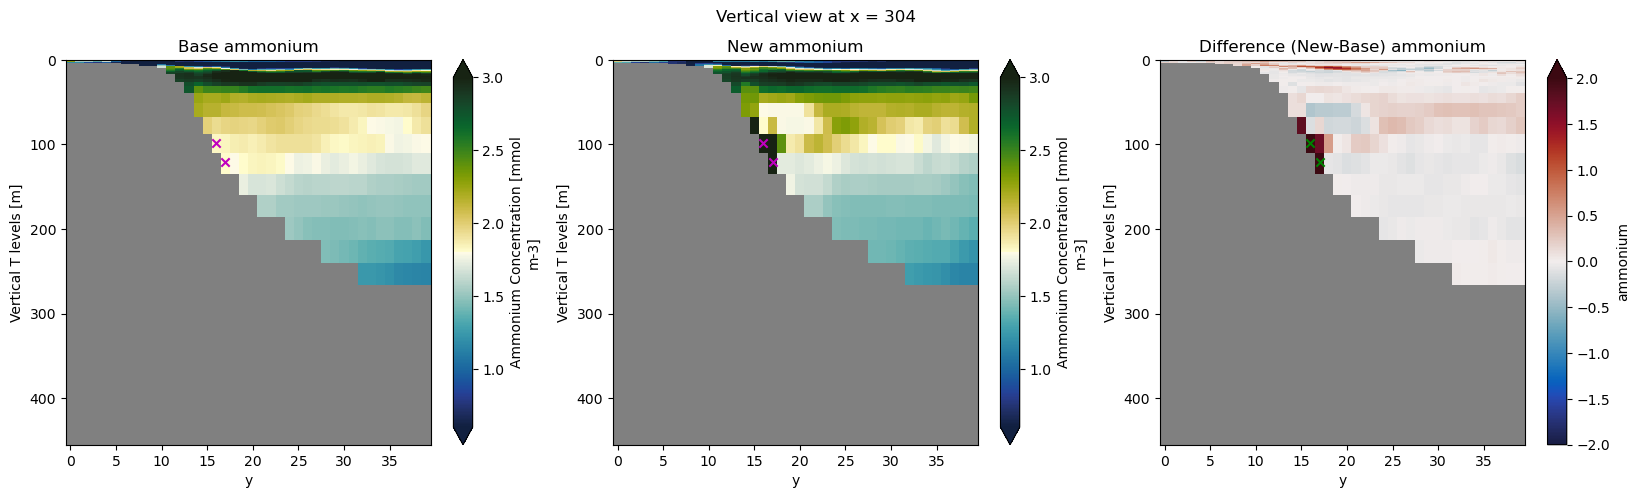

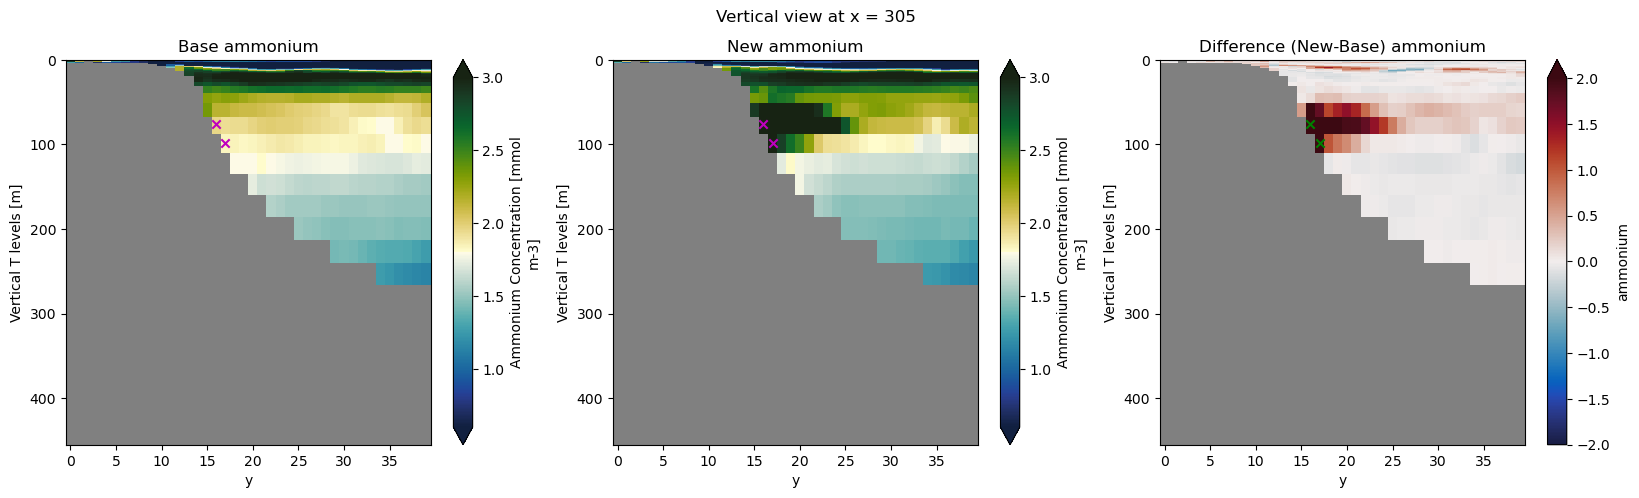

In [10]:
vertical_view_x(base, new, 'ammonium', 23, 304 , cm_delta, 3, 0.6, 2)
vertical_view_x(base, new, 'ammonium', 23, 305 , cm_delta, 3, 0.6, 2)

In [6]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)

new_ammonium_slice = new.isel(y = y_slice, x = x_slice)
base_ammonium_slice = base.isel(y = y_slice, x = x_slice)

In [12]:
def plotAvgDiffTime(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    
    diff_avg = (diff * area.isel(y = y_slice, x = x_slice)).where(tmask.isel(y = y_slice, x = x_slice)).mean(axis = 2).mean(axis = 2) / area.isel(y = y_slice, x = x_slice).where(tmask.isel(y = y_slice, x = x_slice)).mean()
    diff_avg.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    max_depth = diff_avg.argmax(dim = 'deptht')
    #min_depth = diff_avg.argmin(dim='deptht') 
    axs.plot(diff_avg['time_counter'], diff_avg['deptht'][max_depth], 'r-')
    #axs.plot(diff_avg['time_counter'], diff_avg['deptht'][min_depth], 'b-')
    axs.set_title(f'Time Series for average difference in {field}')
    axs.set_ylim(150, 0)

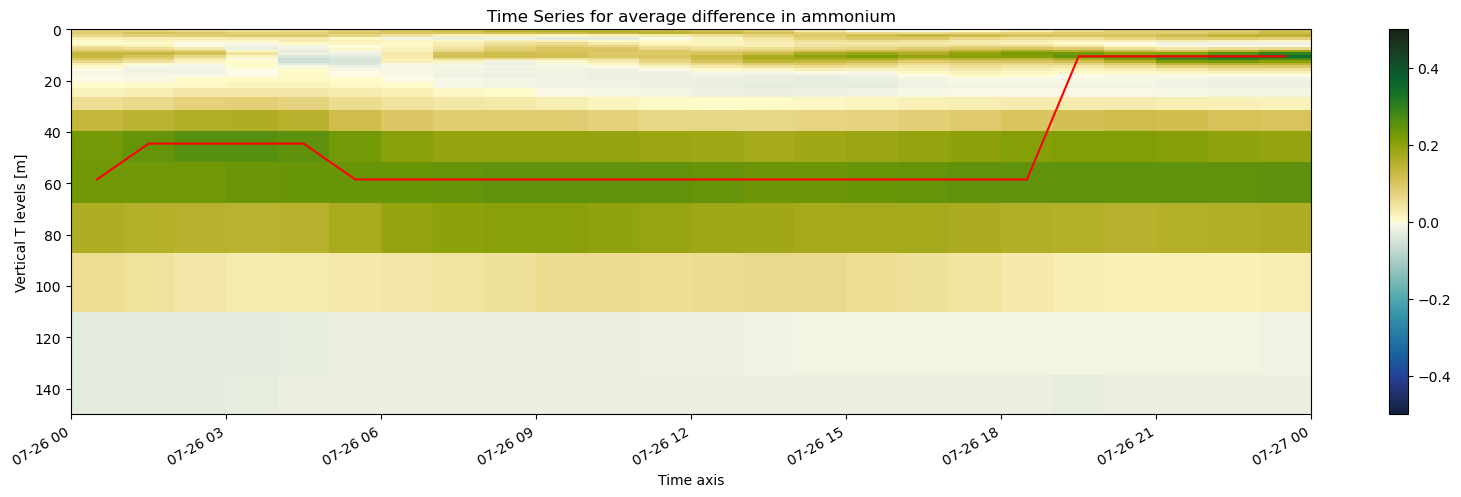

In [13]:
plotAvgDiffTime(base_ammonium_slice, new_ammonium_slice, 'ammonium', -0.5, 0.5, cm_delta)

In [7]:
scale = 40
zdepth = np.zeros_like(meshmask.gdepw_0[0, 0, ii-scale:ii+scale ,jj-scale:jj+scale])
for si, id in enumerate(range(ii-scale, ii+scale)):
    for sj, jd in enumerate(range(jj-scale, jj+scale)):
        zdepth[si, sj] = meshmask.gdepw_0[0, mbathy[id, jd].values, id, jd]

/tmp/ipykernel_1960213/973942249.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  colours = axs[0,0].pcolormesh(meshmask.nav_lon[ii-scale:ii+scale, jj-scale:jj+scale],


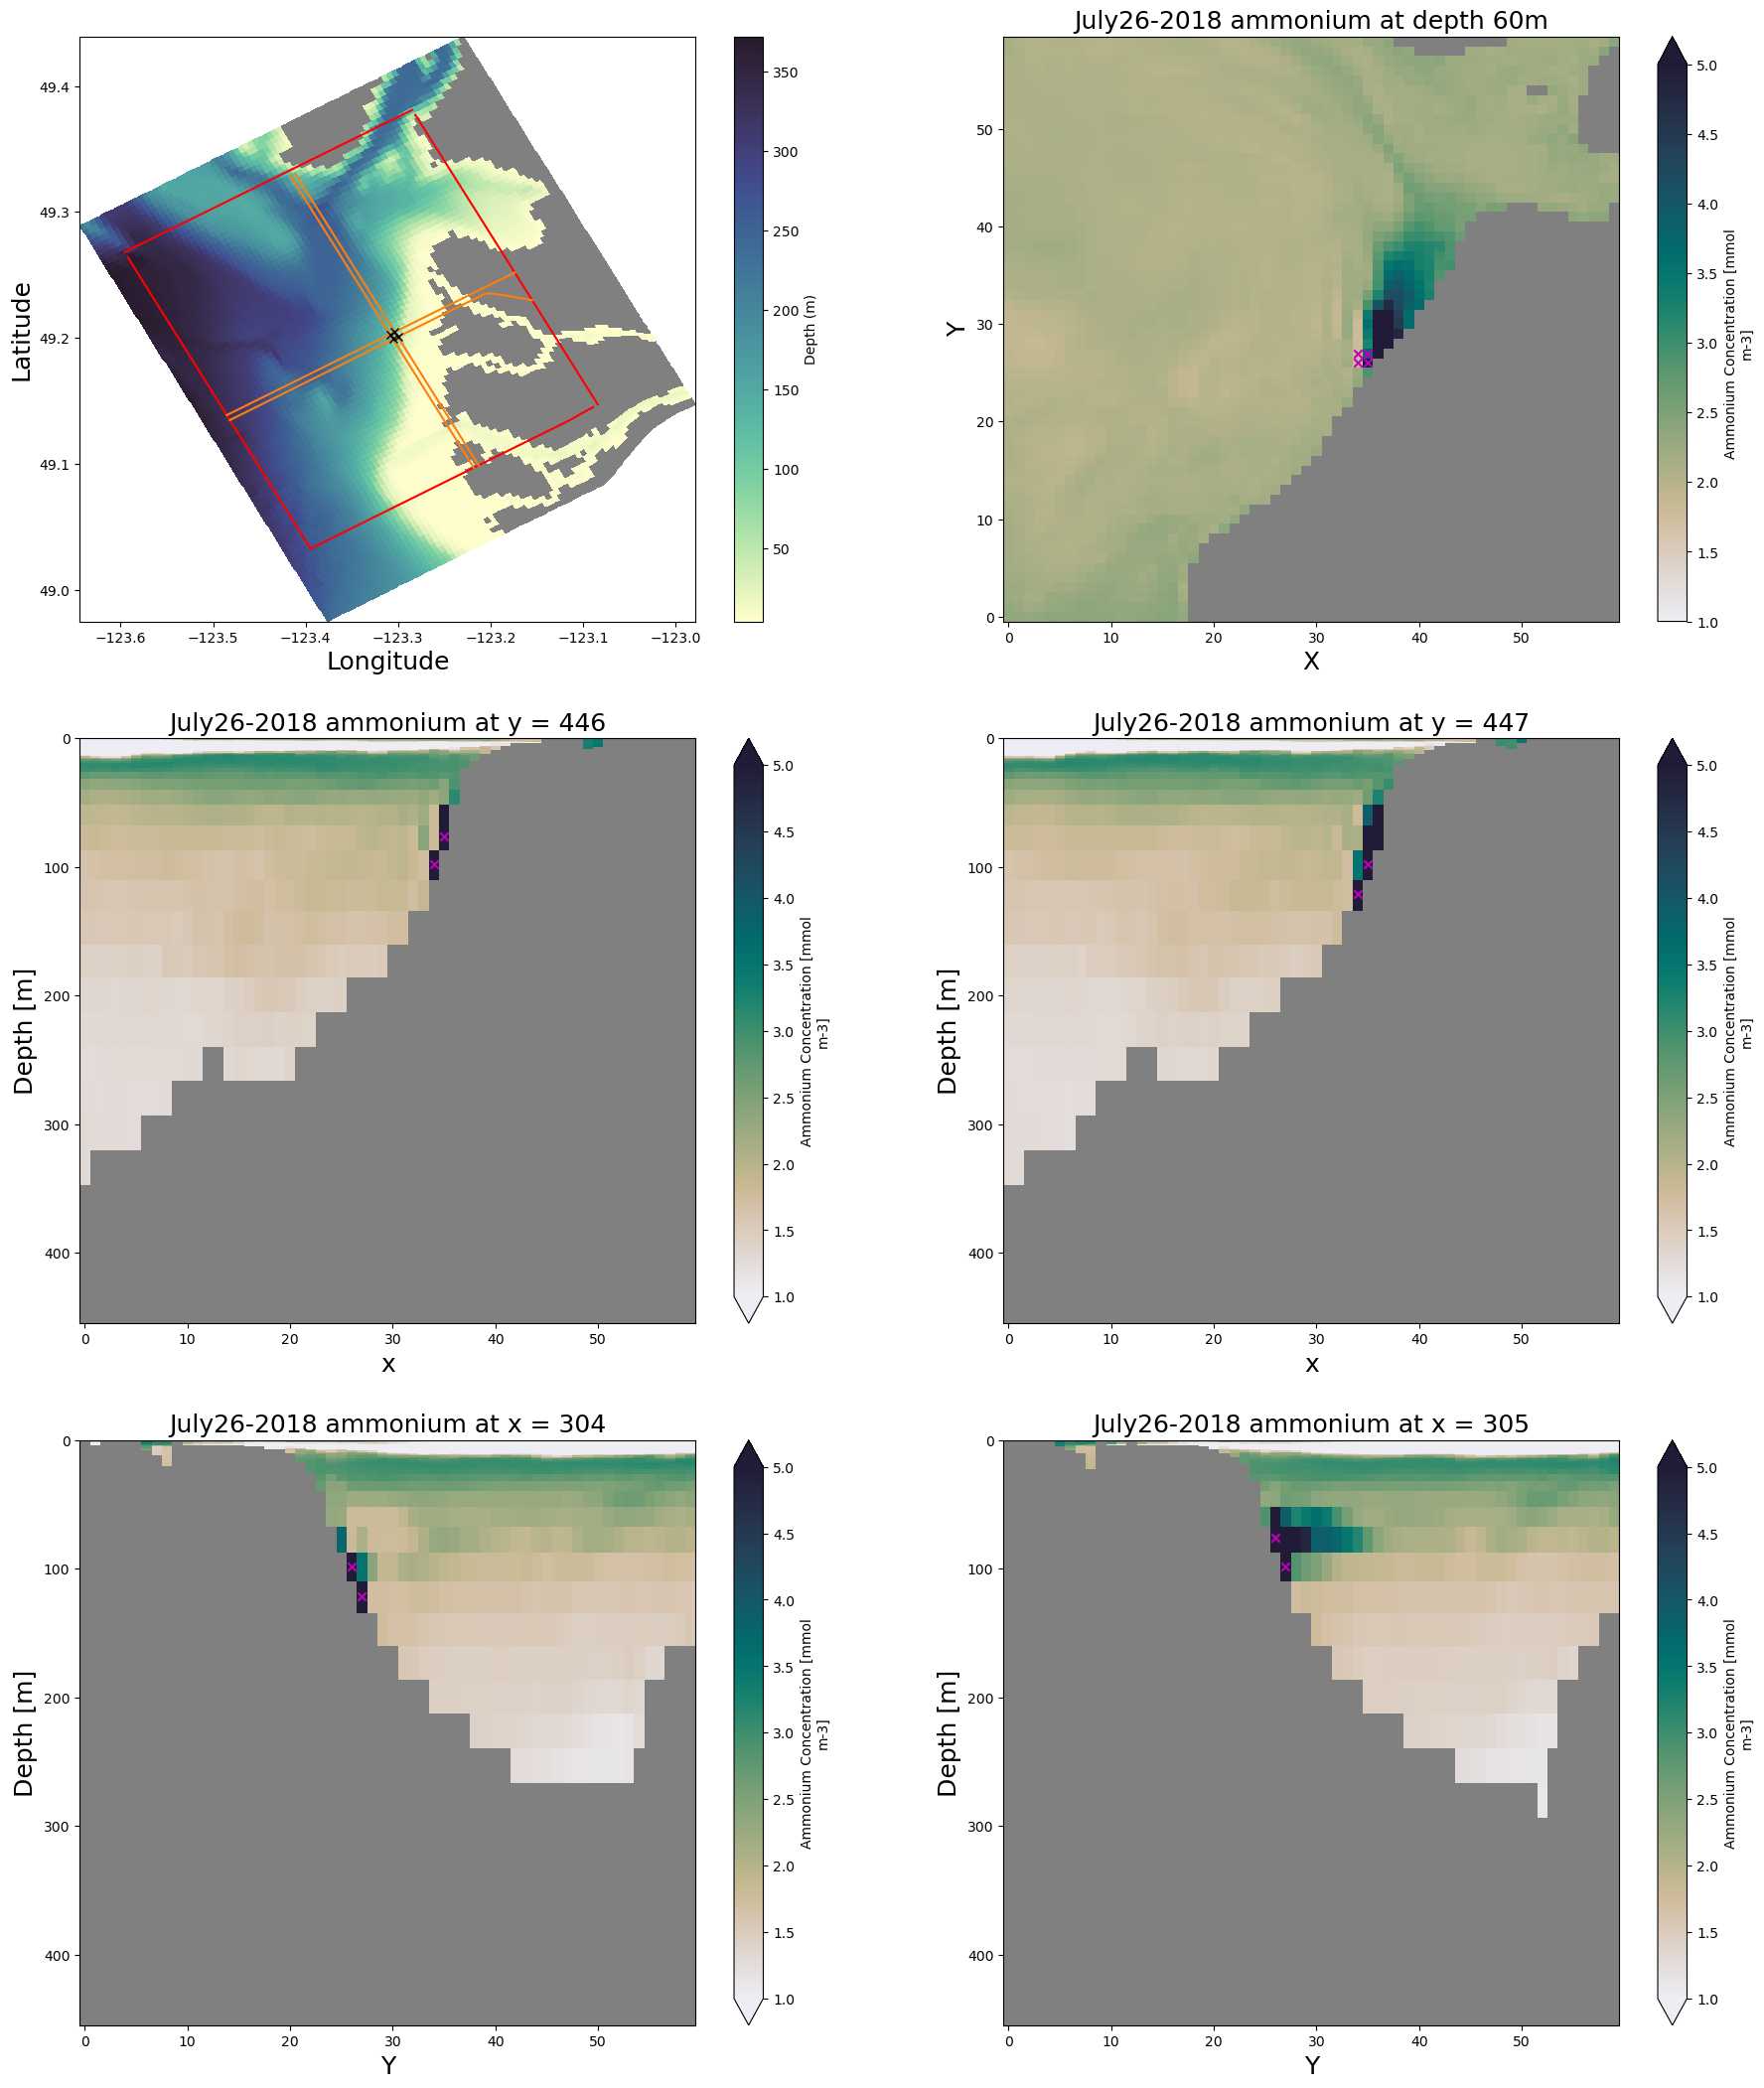

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(22, 26))
scale = 40
iz = 20
colours = axs[0,0].pcolormesh(meshmask.nav_lon[ii-scale:ii+scale, jj-scale:jj+scale], 
               meshmask.nav_lat[ii-scale:ii+scale, jj-scale:jj+scale],
               np.ma.array(zdepth, mask = 1-tmask[0, ii-scale:ii+scale, jj-scale:jj+scale]), cmap=cm_deep)
axs[0,0].plot(meshmask.nav_lon[imin:imax, jmin], meshmask.nav_lat[imin:imax, jmin], 'r')
axs[0,0].plot(meshmask.nav_lon[imin:imax, jmax], meshmask.nav_lat[imin:imax, jmax], 'r')
axs[0,0].plot(meshmask.nav_lon[imin, jmin:jmax], meshmask.nav_lat[imin, jmin:jmax], 'r')
axs[0,0].plot(meshmask.nav_lon[imax, jmin:jmax+1], meshmask.nav_lat[imax, jmin:jmax+1], 'r')
axs[0,0].plot(meshmask.nav_lon[xcy, jmin:jmax+1], meshmask.nav_lat[xcy, jmin:jmax+1], color='tab:orange')
axs[0,0].plot(meshmask.nav_lon[446, jmin:jmax+1], meshmask.nav_lat[446, jmin:jmax+1], color='tab:orange')
axs[0,0].plot(meshmask.nav_lon[imin:imax, ycx], meshmask.nav_lat[imin:imax, ycx], 'tab:orange')
axs[0,0].plot(meshmask.nav_lon[imin:imax, 304], meshmask.nav_lat[imin:imax, 304], 'tab:orange')


axs[0,0].plot(meshmask.nav_lon[446:448, 304:306], meshmask.nav_lat[446:448, 304:306], 'kx')
axs[0,0].set_ylabel('Latitude', fontsize = 18)
axs[0,0].set_xlabel('Longitude', fontsize = 18)
cb = fig.colorbar(colours, ax=axs[0,0])
cb.set_label('Depth (m)')

new['ammonium'][23, 24, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[24, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[0, 1], cmap=cm_rain, vmax=5, vmin=1)
axs[0, 1].set_title(f'July26-2018 ammonium at depth 60m', fontsize = 18)
axs[0, 1].set_xlabel('X', fontsize = 18)
axs[0, 1].set_ylabel('Y', fontsize = 18)

axs[0, 1].scatter(304 - 270, 446 - 420, marker = 'x', color = 'm')
axs[0, 1].scatter(304 - 270, 447 - 420, marker = 'x', color = 'm')
axs[0, 1].scatter(305 - 270, 446 - 420, marker = 'x', color = 'm')
axs[0, 1].scatter(305 - 270, 447 - 420, marker = 'x', color = 'm')

new['ammonium'][23, :, 446, 250+iz:350-iz].where(
         tmask[ :, 446, 250+iz:350-iz]).plot(ax=axs[1, 0], cmap=cm_rain, vmax=5, vmin=1, yincrease = False)
axs[1, 0].set_title('July26-2018 ammonium at y = 446', fontsize = 18)
axs[1, 0].set_xlabel('x', fontsize = 18)
axs[1, 0].set_ylabel('Depth [m]', fontsize = 18)


axs[1, 0].scatter(304 - 270, 98, marker = 'x', color = 'm')
axs[1, 0].scatter(305 - 270, 76, marker = 'x', color = 'm')

new['ammonium'][23, :, 447, 250+iz:350-iz].where(
         tmask[ :, 447, 250+iz:350-iz]).plot(ax=axs[1, 1], cmap=cm_rain, vmax=5, vmin=1, yincrease = False)
axs[1, 1].set_title(f'July26-2018 ammonium at y = 447', fontsize = 18)
axs[1, 1].set_xlabel('x', fontsize = 18)
axs[1, 1].set_ylabel('Depth [m]', fontsize = 18)

axs[1,1].scatter(304 - 270, 121, marker = 'x', color = 'm')
axs[1,1].scatter(305 - 270, 98, marker = 'x', color = 'm')

new['ammonium'][23, :, 400+iz:500-iz, 304].where(
        tmask[:, 400+iz:500-iz, 304]).plot(ax=axs[2,0], cmap=cm_rain, vmax=5, vmin=1, yincrease = False)
axs[2,0].set_title(f'July26-2018 ammonium at x = 304', fontsize = 18)
axs[2, 0].set_xlabel('Y', fontsize = 18)
axs[2, 0].set_ylabel('Depth [m]', fontsize = 18)

axs[2, 0].scatter(447 - 420, 121, marker = 'x', color = 'm')
axs[2, 0].scatter(446 - 420, 98, marker = 'x', color = 'm')

new['ammonium'][23, :, 400+iz:500-iz, 305].where(
        tmask[:, 400+iz:500-iz, 305]).plot(ax=axs[2,1], cmap=cm_rain, vmax=5, vmin=1, yincrease = False)
axs[2,1].set_title(f'July26-2018 ammonium at x = 305', fontsize = 18)
axs[2, 1].set_xlabel('Y', fontsize = 18)
axs[2, 1].set_ylabel('Depth [m]', fontsize = 18)

axs[2, 1].scatter(447 - 420, 98, marker = 'x', color = 'm')
axs[2, 1].scatter(446 - 420, 76, marker = 'x', color = 'm')
fig.savefig('ammonium26July2018.png', dpi=300)
